<a href="https://colab.research.google.com/github/rk2026/zzz/blob/main/min_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [2]:
!pip install geopandas --upgrade

Import necessary library

In [3]:
import streamlit as st
import io
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj
#from google.colab import files
from shapely.geometry import Point, Polygon, box
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
print(gpd.__version__)

1.0.1


To get all library version.

In [5]:
!pip freeze > requirements.txt

#User Input

In [ ]:
# Step 1: Upload the CSV file
stemmapping = st.file_uploader("Upload your treeLoc.csv file", type="csv")
if stemmapping is not None:
    tree_loc_df = pd.read_csv(uploaded_file)
    st.write("treeLoc DataFrame:", tree_loc_df)

# Step 2: Input the EPSG code
epsg_code = st.text_input("Enter EPSG code (e.g., 'EPSG:4326')")

# Step 3: Input grid spacing as a float number
grid_spacing = st.number_input("Enter grid spacing", min_value=0.0, step=0.1)

# Store values in variables to use later
if st.button("Submit"):
    # Ensure inputs are valid before using
    if uploaded_file and epsg_code and grid_spacing:
        # Now, tree_loc_df, epsg_code, and grid_spacing can be used as needed
        st.write("All inputs captured successfully!")
        # Proceed with further processing here
    else:
        st.warning("Please provide all inputs.")


2024-11-16 14:52:27.408 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:52:27.409 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:52:27.412 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:52:27.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:52:27.566 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-16 14:52:27.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:52:27.572 Thread 'MainThread'

#comment the code before streamlit

In [ ]:
'''# User input part
def upload_csv_to_df(filename):
  """Uploads a CSV file and returns a pandas DataFrame."""
  uploaded = files.upload()
  if uploaded:
    for fn in uploaded.keys():
      if fn == filename:
        return pd.read_csv(io.BytesIO(uploaded[fn]))
  return None

# Step 1: Upload stemmapping.csv file
stemmapping_df = upload_csv_to_df('TreeLoc.csv')

if stemmapping_df is not None:
  print("stemmapping DataFrame:")
  print(stemmapping_df)
else:
  print("Please upload the stemmapping.csv file.")

# Step 2: Get EPSG code as text input
epsg_code = input("Enter EPSG code (copy this code and paste, 'EPSG:4326'): ")

# Step 3: Get grid spacing as a float number
while True:
  try:
    grid_spacing = float(input("Enter grid spacing (e.g., 20.0): "))
    break
  except ValueError:
    print("Invalid input! Please enter a valid number for grid spacing.")

# Now you can use stemmapping_df, epsg_code, and grid_spacing in your code
if stemmapping_df is not None and epsg_code and grid_spacing:
  print("All inputs captured successfully!")
  # Proceed with further processing here
else:
  print("Please make sure all inputs are provided.")'''


Saving TreeLoc.csv to TreeLoc.csv
stemmapping DataFrame:
       TID           species  LONGITUDE   LATITUDE  dia_cm  height_m  class
0        1    Shorea robusta  85.354139  27.710306      60        25      2
1        2    Shorea robusta  85.356196  27.708675      60        25      2
2        3    Shorea robusta  85.352251  27.710872      60        25      2
3        4    Shorea robusta  85.353474  27.709067      60        25      2
4        5  Alnus nepalensis  85.353831  27.709137     104        21      2
...    ...               ...        ...        ...     ...       ...    ...
1995  1996    Shorea robusta  85.355711  27.708888      39        26      1
1996  1997  Terminalia alata  85.354637  27.704039      55        16      1
1997  1998  Trewia nudiflora  85.356302  27.707725     110        19      4
1998  1999         Tsuga spp  85.353816  27.706036      69        15      2
1999  2000         Terai spp  85.351780  27.707798      32        29      3

[2000 rows x 7 columns]
Enter 

In [ ]:
stemmapping_df = pd.read_csv('TreeLoc.csv')

Hardcoded constant value.

Create a geometry column based on LATITUDE and LONGITUDE columns

In [ ]:
geometry = [Point(xy) for xy in zip(stemmapping_df['LONGITUDE'], stemmapping_df['LATITUDE'])]

converting df to gdf

In [ ]:
stemmapping_gdf = gpd.GeoDataFrame(stemmapping_df, geometry=geometry)

In [ ]:
# Create the data dictionary
data = {
    'SN': range(1, 26),
    'scientific_name': ['Abies spp', 'Acacia catechu', 'Adina cardifolia', 'Albizia spp', 'Alnus nepalensis',
                       'Anogeissus latifolia', 'Bombax ceiba', 'Cedrela toona', 'Dalbergia sissoo',
                       'Eugenia Jambolana', 'Hymenodictyon excelsum', 'Lagerstroemia parviflora',
                       'Michelia champaca', 'Pinus roxburghii', 'Pinus wallichiana', 'Quercus spp',
                       'Schima wallichii', 'Shorea robusta', 'Terminalia alata', 'Trewia nudiflora',
                       'Tsuga spp', 'Terai spp', 'Hill spp', 'Coniferious', 'Broadleaved'],
    'a': [-2.4453, -2.3256, -2.5626, -2.4284, -2.7761, -2.272, -2.3856, -2.1832, -2.1959, -2.5693,
          -2.585, -2.3411, -2.0152, -2.977, -2.8195, -2.36, -2.7385, -2.4554, -2.4616, -2.4585,
          -2.5293, -2.3993, -2.3204, None, None],
    'b': [1.722, 1.6476, 1.8598, 1.7609, 1.9006, 1.7499, 1.7414, 1.8679, 1.6567, 1.8816,
          1.9437, 1.7246, 1.8555, 1.9235, 1.725, 1.968, 1.8155, 1.9026, 1.8497, 1.8043,
          1.7815, 1.7836, 1.8507, None, None],
    'c': [1.0757, 1.0552, 0.8783, 0.9662, 0.9428, 0.9174, 1.0063, 0.7569, 0.9899, 0.8498,
          0.7902, 0.9702, 0.763, 1.0019, 1.1623, 0.7496, 1.0072, 0.8352, 0.88, 0.922,
          1.0369, 0.9546, 0.8223, None, None],
    'a1': [5.4433, 5.4401, 5.4681, 4.4031, 6.019, 4.9502, 4.5554, 4.9705, 4.358, 5.1749,
           5.5572, 5.3349, 3.3499, 6.2696, 5.7216, 4.8511, 7.4617, 5.2026, 4.5968, 5.3475,
           5.2774, 4.8991, 5.5323, None, None],
    'b1': [-2.6902, -2.491, -2.491, -2.2094, -2.7271, -2.3353, -2.3009, -2.3436, -2.1559, -2.3636,
           -2.496, -2.4428, -2.0161, -2.8252, -2.6788, -2.4494, -3.0676, -2.4788, -2.2305, -2.4774,
           -2.6483, -2.3406, -2.4815, None, None],
    's': [0.436, 0.443, 0.443, 0.443, 0.803, 0.443, 0.443, 0.443, 0.684, 0.443,
          0.443, 0.443, 0.443, 0.189, 0.683, 0.747, 0.52, 0.055, 0.443, 0.443,
          0.443, 0.443, 0.443, 0.436, 0.443],
    'm': [0.372, 0.511, 0.511, 0.511, 1.226, 0.511, 0.511, 0.511, 0.684, 0.511,
          0.511, 0.511, 0.511, 0.256, 0.488, 0.96, 0.186, 0.341, 0.511, 0.511,
          0.511, 0.511, 0.511, 0.372, 0.511],
    'bg': [0.355, 0.71, 0.71, 0.71, 1.51, 0.71, 0.71, 0.71, 0.684, 0.71,
           0.71, 0.71, 0.71, 0.3, 0.41, 1.06, 0.168, 0.357, 0.71, 0.71,
           0.71, 0.71, 0.71, 0.355, 0.71],
    'Local_Name': ['Thingre Salla', 'Khayar', 'Karma', 'Siris', 'Uttis', 'Banjhi', 'Simal', 'Tooni',
                   'Sissoo', 'Jamun', 'Bhudkul', 'Botdhayero', 'Chanp', 'Khote Salla', 'Gobre Salla',
                   'Kharsu', 'Chilaune', 'Sal', 'Saj', 'Gamhari', 'Dhupi Salla', 'Terai Spp',
                   'Hill spp', None, None]
}

wrap constant data in a variable

In [ ]:
sppVal = pd.DataFrame(data)
sppVal = sppVal.fillna('')

For testing purpose to upload file I am using geopandas. when using streamlit comment this code.

In [ ]:
joined_gdf = stemmapping_gdf.merge(sppVal, left_on='species', right_on='scientific_name')

copy the joined_df as 'result_df'.

In [ ]:
result_gdf = joined_gdf.copy()

In [ ]:
def add_calculated_columns(df):
    df['stem_volume'] = (df['a'] + df['b'] * df['dia_cm'].apply(lambda x: np.log(x)) + df['c'] * df['height_m'].apply(lambda x: np.log(x))).apply(np.exp) / 1000
    df['branch_ratio'] = df['dia_cm'].apply(lambda x: 0.1 if x < 10 else 0.2)
    df['branch_volume'] = df['stem_volume'] * df['branch_ratio']
    df['tree_volume'] = df['stem_volume'] + df['branch_volume']
    df['cm10diaratio'] = (df['a1'] + df['b1'] * df['dia_cm'].apply(lambda x: np.log(x))).apply(np.exp)
    df['cm10topvolume'] = df['stem_volume'] * df['cm10diaratio']
    df['gross_volume'] = df['stem_volume'] - df['cm10topvolume']
    df['net_volume'] = df.apply(lambda row: row['gross_volume'] * 0.9 if row['class'] == 'A' else row['gross_volume'] * 0.8, axis=1)
    df['net_volum_cft'] = df['net_volume'] * 35.3147
    df['firewood_m3'] = df['tree_volume'] - df['net_volume']
    df['firewood_chatta'] = df['firewood_m3'] * 0.105944
    return df


Add calculated column

In [ ]:
def add_calculated_columns(df):
    # Convert relevant columns to numeric, handling errors
    for col in ['a', 'b', 'c', 'dia_cm', 'height_m', 'a1', 'b1']:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' converts invalid values to NaN

    # Apply np.exp to the entire Series instead of individual elements
    df['stem_volume'] = np.exp(df['a'] + df['b'] * np.log(df['dia_cm']) + df['c'] * np.log(df['height_m'])) / 1000
    df['branch_ratio'] = df['dia_cm'].apply(lambda x: 0.1 if x < 10 else 0.2)
    df['branch_volume'] = df['stem_volume'] * df['branch_ratio']
    df['tree_volume'] = df['stem_volume'] + df['branch_volume']
    # Apply np.exp to the entire Series instead of individual elements
    df['cm10diaratio'] = np.exp(df['a1'] + df['b1'] * np.log(df['dia_cm']))
    df['cm10topvolume'] = df['stem_volume'] * df['cm10diaratio']
    df['gross_volume'] = df['stem_volume'] - df['cm10topvolume']
    df['net_volume'] = df.apply(lambda row: row['gross_volume'] * 0.9 if row['class'] == 'A' else row['gross_volume'] * 0.8, axis=1)
    df['net_volum_cft'] = df['net_volume'] * 35.3147
    df['firewood_m3'] = df['tree_volume'] - df['net_volume']
    df['firewood_chatta'] = df['firewood_m3'] * 0.105944
    return df

In [ ]:
# prompt: I want to calculate using 'add_calculated_columns' function in result_gdf. How?

result_gdf = add_calculated_columns(result_gdf)

## Function to perform calculations and add new columns

Apply the function to the dataframe

In [ ]:
columns_to_drop = ['SN', 'scientific_name', 'a', 'b', 'c', 'a1', 'b1', 's', 'm', 'bg']
result_gdf = result_gdf.drop(columns=columns_to_drop)

In [ ]:
# Assuming 'result_gdf' is your GeoDataFrame
minx, miny, maxx, maxy = result_gdf.total_bounds
bounding_polygon = Polygon([(minx, miny), (maxx, miny), (maxx, maxy), (minx, maxy)])

bounding_gdf = gpd.GeoDataFrame(geometry=[bounding_polygon], crs=result_gdf.crs)

In [ ]:
bounding_gdf = bounding_gdf.set_crs("EPSG:4326")

In [ ]:
result_gdf = result_gdf.set_crs("EPSG:4326")

creating grid

In [ ]:
# Assuming 'bounding_gdf' is your GeoDataFrame in 'EPSG:4326'

# Define the grid spacing in meters (20 meters in this case)
spacing_meters = grid_spacing

# Get the bounds of the bounding geometry
xmin, ymin, xmax, ymax = bounding_gdf.total_bounds

# Calculate spacing in degrees based on the center of the bounding box
center_lat = (ymin + ymax) / 2
spacing_degrees = spacing_meters / (111320 * np.cos(np.radians(center_lat)))  # Approximate conversion

# Create a list of x and y coordinates for the grid points
x_coords = []
current_x = xmin
while current_x < xmax:
    x_coords.append(current_x)
    current_x += spacing_degrees

y_coords = []
current_y = ymin
while current_y < ymax:
    y_coords.append(current_y)
    current_y += spacing_degrees

# Create a list of polygons representing the grid cells
polygons = []
for x in x_coords:
    for y in y_coords:
        polygons.append(Polygon([(x, y), (x + spacing_degrees, y),
                                 (x + spacing_degrees, y + spacing_degrees), (x, y + spacing_degrees)]))

# Create a GeoDataFrame from the polygons
grid_gdf = gpd.GeoDataFrame({'geometry': polygons}, crs='EPSG:4326')

# (Optional) Clip the grid to the bounding geometry
grid_gdf = gpd.clip(grid_gdf, bounding_gdf)
grid_gdf = grid_gdf.set_crs("EPSG:4326")


In [ ]:
# Select polygons from grid_gdf that intersect with result_gdf
selected_polygons = grid_gdf[grid_gdf.intersects(result_gdf.unary_union)]

# Create centroid_gdf from the selected polygons
centroid_gdf = selected_polygons.copy()
centroid_gdf['geometry'] = selected_polygons['geometry'].centroid

<ipython-input-20-6570b689e6b5>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  selected_polygons = grid_gdf[grid_gdf.intersects(result_gdf.unary_union)]
<ipython-input-20-6570b689e6b5>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_gdf['geometry'] = selected_polygons['geometry'].centroid


In [ ]:
# Use allow_override=True to replace the existing CRS without transformation
result_gdf = result_gdf.set_crs("EPSG:32645", allow_override=True)
centroid_gdf = centroid_gdf.set_crs("EPSG:32645", allow_override=True)

In [ ]:
# Assuming 'result_gdf' and 'centroid_gdf' are defined as in your previous code
# Create a new column 'remark' in result_gdf, initializing all values to 'Felling Tree'
result_gdf['remark'] = 'Felling Tree'

# Iterate through each centroid in centroid_gdf
for index, centroid_row in centroid_gdf.iterrows():
    centroid_point = centroid_row['geometry']

    # Find the nearest point in result_gdf to the current centroid
    # Replaced 'unary_union' with 'union_all()' to address the deprecation warning
    nearest_geoms = nearest_points(centroid_point, result_gdf.geometry.union_all())
    nearest_point_in_result = nearest_geoms[1]  # The second point is from result_gdf

    # Find the index of the nearest point in result_gdf
    nearest_index = result_gdf[result_gdf['geometry'] == nearest_point_in_result].index[0]

    # Update the 'remark' column for the nearest point
    result_gdf.loc[nearest_index, 'remark'] = 'Mother Tree'

In [ ]:
result_gdf =result_gdf.copy()

In [ ]:
nearest_points_gdf = gpd.sjoin_nearest(centroid_gdf, result_gdf, how='left', distance_col='distance')

In [ ]:
'''result_gdf.plot(column='remark', cmap='RdBu', legend=True)'''

"result_gdf.plot(column='remark', cmap='RdBu', legend=True)"

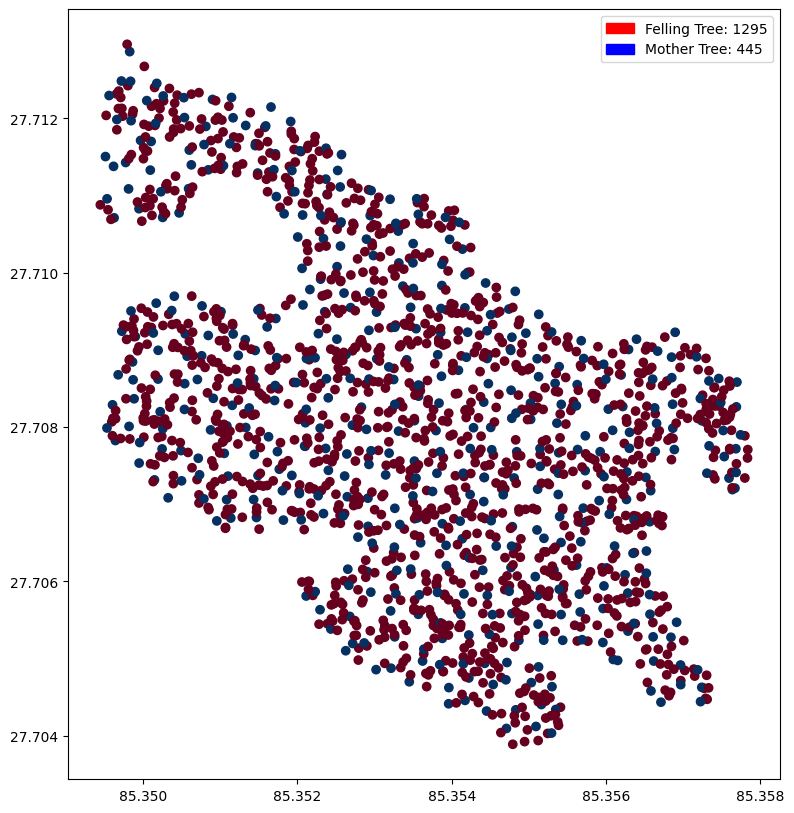

In [ ]:
# Assuming result_gdf is your GeoDataFrame with the 'remark' column

# Calculate counts for each category
mother_tree_count = result_gdf[result_gdf['remark'] == 'Mother Tree'].shape[0]
felling_tree_count = result_gdf[result_gdf['remark'] == 'Felling Tree'].shape[0]

# Create custom legend handles with counts
red_patch = mpatches.Patch(color='red', label=f'Felling Tree: {felling_tree_count}')
blue_patch = mpatches.Patch(color='blue', label=f'Mother Tree: {mother_tree_count}')

# Plot the GeoDataFrame with custom legend
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed
result_gdf.plot(column='remark', cmap='RdBu', legend=True, ax=ax)

# Replace the default legend with the custom legend
ax.legend(handles=[red_patch, blue_patch])

plt.show()

In [ ]:
'''# Convert the GeoDataFrame to a CSV file and save it to disk
result_gdf.to_csv('result_gdf.csv', index=False)
files.download('result_gdf.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert GeoDataFrame to CSV format
csv_data = result_gdf.to_csv(index=False)
# Provide a download button
st.download_button(
    label="Download CSV",
    data=csv_data,
    file_name="result_gdf.csv",
    mime="text/csv"
)

2024-11-16 14:59:36.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:59:36.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:59:36.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:59:36.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:59:36.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 14:59:36.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


False